In [1]:
import numpy as np
import random

In [2]:
COOPERATOR = 0
DEFECTOR = 1

In [3]:
virus_pop_size = 100
virus_population = random.choices([COOPERATOR, DEFECTOR], k=virus_pop_size)


In [4]:
print(virus_population)

[0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]


In [5]:
np.random.shuffle(virus_population)
print(virus_population)

[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]


In [6]:
cell_pop_size = 30

viral_subpops = np.array_split(virus_population, cell_pop_size)
viral_subpops

[array([0, 1, 1, 1]),
 array([0, 0, 0, 0]),
 array([0, 1, 1, 1]),
 array([0, 1, 1, 0]),
 array([0, 0, 1, 1]),
 array([0, 1, 1, 1]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([0, 1, 1, 0]),
 array([1, 1, 1, 0]),
 array([1, 0, 1]),
 array([1, 0, 1]),
 array([0, 1, 1]),
 array([0, 0, 0]),
 array([1, 1, 1]),
 array([0, 0, 1]),
 array([0, 0, 0]),
 array([0, 0, 0]),
 array([1, 1, 0]),
 array([0, 1, 1]),
 array([1, 0, 1]),
 array([1, 0, 1]),
 array([1, 1, 0]),
 array([0, 0, 1]),
 array([0, 1, 0]),
 array([0, 0, 1]),
 array([1, 0, 1]),
 array([0, 0, 0]),
 array([1, 0, 0]),
 array([0, 0, 1])]

## Just redefining things so we're starting fresh! 

In [7]:
payoff_matrix = [[1.00, 0.65],
                 [1.99, 0.83]]

COOPERATOR = 0
DEFECTOR = 1

virus_pop_size = 100
cell_pop_size = 50

virus_population = random.choices([COOPERATOR, DEFECTOR], k=virus_pop_size)

np.random.shuffle(virus_population)
viral_subpops = np.array_split(virus_population, cell_pop_size)


## Calculate fitness, do selection, and replace the virus population with the next generation

In [8]:
#Randomly shuffle the viruses
np.random.shuffle(virus_population)

#keep track of viral fitness
virus_pop_fitnesses = []


#Distribute the viruses to their host cells
#(n.b., this keeps the order intact in the splits)
viral_subpops = np.array_split(virus_population, cell_pop_size)


#Calculate fitness for each virus
for subpop in viral_subpops:
    type_counts = {COOPERATOR:np.count_nonzero(subpop==COOPERATOR), DEFECTOR:np.count_nonzero(subpop==DEFECTOR)}
    total_payoffs = [payoff_matrix[individual][COOPERATOR]*type_counts[COOPERATOR]+
                     payoff_matrix[individual][DEFECTOR]*type_counts[DEFECTOR] 
                      for individual in subpop]
    
    virus_pop_fitnesses += total_payoffs

#Build the next viral generation by sampling with weights assigned by their fitness
next_virus_pop = random.choices(virus_population, weights=virus_pop_fitnesses, k=virus_pop_size)
    
virus_population = next_virus_pop

prop_cheaters = sum(virus_population)/virus_pop_size
print(prop_cheaters)

0.49


## 1. Spend 10 minutes or so writing a loop to explore the population dynamics over ~20 generations (maybe more?) and plot them.





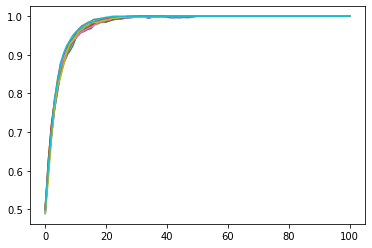

In [12]:
import matplotlib.pyplot as plt

payoff_matrix = [[1.00, 0.65],
                 [1.99, 0.83]]

COOPERATOR = 0
DEFECTOR = 1

virus_pop_size = 3000
cell_pop_size = 500
num_gens = 100
reps = 10

for j in range(reps):
    virus_population = random.choices([COOPERATOR, DEFECTOR], k=virus_pop_size)

    np.random.shuffle(virus_population)
    viral_subpops = np.array_split(virus_population, cell_pop_size)

    prop_cheaters_list = [sum(virus_population)/virus_pop_size]

    for i in range(num_gens):
        #Randomly shuffle the viruses
        np.random.shuffle(virus_population)

        #keep track of viral fitness
        virus_pop_fitnesses = []

        #Distribute the viruses to their host cells
        #(n.b., this keeps the order intact in the splits)
        viral_subpops = np.array_split(virus_population, cell_pop_size)


        #Calculate fitness for each virus
        for subpop in viral_subpops:
            type_counts = {COOPERATOR:np.count_nonzero(subpop==COOPERATOR), DEFECTOR:np.count_nonzero(subpop==DEFECTOR)}
            total_payoffs = [payoff_matrix[individual][COOPERATOR]*type_counts[COOPERATOR]+
                             payoff_matrix[individual][DEFECTOR]*type_counts[DEFECTOR] 
                              for individual in subpop]

            virus_pop_fitnesses += total_payoffs

        #Build the next viral generation by sampling with weights assigned by their fitness
        next_virus_pop = random.choices(virus_population, weights=virus_pop_fitnesses, k=virus_pop_size)

        virus_population = next_virus_pop

        prop_cheaters = sum(virus_population)/virus_pop_size
        prop_cheaters_list.append(prop_cheaters)
    plt.plot(prop_cheaters_list)
plt.show()

## 2. What happens when you change the number of viruses expected per cell? This the MOI (multiplicity of infection) by the way! 